# Pandas y Valores Faltandes




## Wine Reviews dataset

Vamos a trabajar con el siguiente dataset, que corresponde a reviews de vinos:

https://www.kaggle.com/zynicide/wine-reviews/downloads/wine-reviews.zip/4

Recomendamos leer su descripción y, cuando tengan tiempo, mirar algunos de los "kernels" que pueden encontrar en Kaggle.

1. Abrir el dataset e imprimir sus primeras instancias. Pueden descargarlo del link o usar el que está en el Trello.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
wine_reviews = pd.read_csv('Clase_05_wine_reviews.txt', sep='\t', encoding="ansi")

In [3]:
wine_reviews.dtypes

Unnamed: 0                 int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

In [4]:
wine_reviews.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [5]:
wine_reviews.describe()

,Unnamed: 0,points,price
count,51000.000000,51000.000000,47417.000000
mean,25499.500000,88.447588,35.365966
std,14722.576201,3.051946,39.706123
min,0.000000,80.000000,4.000000
25%,12749.750000,86.000000,17.000000
50%,25499.500000,88.000000,25.000000
75%,38249.250000,91.000000,42.000000
max,50999.000000,100.000000,2500.000000


In [6]:
wine_reviews.isna().sum()

Unnamed: 0                   0
country                     28
description                  0
designation              14661
points                       0
price                     3583
province                    28
region_1                  8353
region_2                 31396
taster_name              10502
taster_twitter_handle    12388
title                        0
variety                      0
winery                       0
dtype: int64

In [7]:
wine_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             51000 non-null  int64  
 1   country                50972 non-null  object 
 2   description            51000 non-null  object 
 3   designation            36339 non-null  object 
 4   points                 51000 non-null  int64  
 5   price                  47417 non-null  float64
 6   province               50972 non-null  object 
 7   region_1               42647 non-null  object 
 8   region_2               19604 non-null  object 
 9   taster_name            40498 non-null  object 
 10  taster_twitter_handle  38612 non-null  object 
 11  title                  51000 non-null  object 
 12  variety                51000 non-null  object 
 13  winery                 51000 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 5.4+

In [8]:
wine_reviews.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",VulkÃ Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin Oâ€™Keefe,#¿NOMBRE?,Nicosia 2013 VulkÃ Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,#¿NOMBRE?,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineÂ,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineÂ,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [9]:
wine_reviews.shape

(51000, 14)

In [10]:
#wine_reviews.select_dtypes(include=np.number)
cols=wine_reviews.select_dtypes(include=np.object).columns.tolist()

for col in cols:
    print(wine_reviews[col].value_counts(dropna=False))

US                        21123
France                     8683
Italy                      7880
Spain                      2619
Portugal                   2266
Chile                      1758
Argentina                  1494
Austria                    1316
Australia                   920
Germany                     820
New Zealand                 600
South Africa                536
Israel                      197
Greece                      184
Canada                       89
Bulgaria                     58
Uruguay                      50
Hungary                      46
Romania                      46
Croatia                      36
Turkey                       34
Georgia                      32
NaN                          28
Mexico                       27
Moldova                      26
Brazil                       24
Slovenia                     22
England                      19
Lebanon                      16
Cyprus                        6
Peru                          6
Morocco 

2. ¿Cuántas columnas (features) tiene?¿Cuáles son sus nombres?¿Y cuántas filas (instancias)? Luego, descartar la columna `'Unnamed: 0'`.

In [11]:
print(wine_reviews.shape)
print(wine_reviews.columns)
wine_reviews.drop(columns=['Unnamed: 0'], inplace = True)

(51000, 14)
Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')


3. ¿Cuántos valores faltantes hay en cada columna?

In [12]:
wine_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                50972 non-null  object 
 1   description            51000 non-null  object 
 2   designation            36339 non-null  object 
 3   points                 51000 non-null  int64  
 4   price                  47417 non-null  float64
 5   province               50972 non-null  object 
 6   region_1               42647 non-null  object 
 7   region_2               19604 non-null  object 
 8   taster_name            40498 non-null  object 
 9   taster_twitter_handle  38612 non-null  object 
 10  title                  51000 non-null  object 
 11  variety                51000 non-null  object 
 12  winery                 51000 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 5.1+ MB


In [13]:
print(wine_reviews.isna().sum())

country                     28
description                  0
designation              14661
points                       0
price                     3583
province                    28
region_1                  8353
region_2                 31396
taster_name              10502
taster_twitter_handle    12388
title                        0
variety                      0
winery                       0
dtype: int64


4. ¿Cuál o cuáles son los vinos con más valores faltantes?

In [14]:
wine_reviews.isna().sum(axis = 1).idxmax()

194

In [15]:
wine_reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",VulkÃ Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin Oâ€™Keefe,#¿NOMBRE?,Nicosia 2013 VulkÃ Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,#¿NOMBRE?,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineÂ,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineÂ,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [16]:
wine_reviews.iloc[wine_reviews.isna().sum(axis = 1).idxmax()]

country                                                              Italy
description              Here's a traditional Chianti Classico with pre...
designation                                                            NaN
points                                                                  87
price                                                                  NaN
province                                                           Tuscany
region_1                                                  Chianti Classico
region_2                                                               NaN
taster_name                                                            NaN
taster_twitter_handle                                                  NaN
title                                   Campomaggio 2005  Chianti Classico
variety                                                         Sangiovese
winery                                                         Campomaggio
Name: 194, dtype: object

5. Hacerse alguna pregunta acerca del dataset e intentar responderla. Por ejemplo, ¿cuáles son el peor y el mejor vino? Imprimir en pantalla sus características y su descripción. ¿Hay un solo vino que sea el mejor o el peor?

In [17]:
wine_reviews.points.describe()

count    51000.000000
mean        88.447588
std          3.051946
min         80.000000
25%         86.000000
50%         88.000000
75%         91.000000
max        100.000000
Name: points, dtype: float64

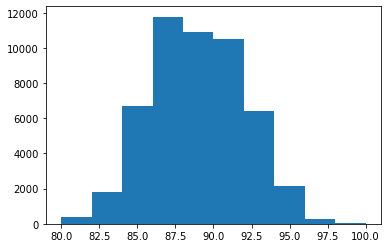

In [18]:
plt.hist(wine_reviews.points, bins=10); plt.show()

In [19]:
wine_reviews.loc[wine_reviews.points.idxmax()]

country                                                          Australia
description              This wine contains some material over 100 year...
designation                                                           Rare
points                                                                 100
price                                                                  350
province                                                          Victoria
region_1                                                        Rutherglen
region_2                                                               NaN
taster_name                                                 Joe Czerwinski
taster_twitter_handle                                            #¿NOMBRE?
title                    Chambers Rosewood Vineyards NV Rare Muscat (Ru...
variety                                                             Muscat
winery                                         Chambers Rosewood Vineyards
Name: 345, dtype: object

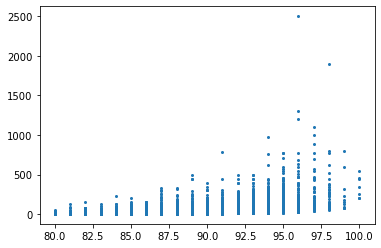

In [20]:
plt.plot(wine_reviews.points,wine_reviews.price,'o',markersize=2)
plt.show()

In [21]:
wine_reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",VulkÃ Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin Oâ€™Keefe,#¿NOMBRE?,Nicosia 2013 VulkÃ Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,#¿NOMBRE?,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineÂ,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineÂ,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [22]:
wine_reviews.points.idxmax()

345

In [23]:
wine_reviews.loc[wine_reviews.points.idxmax()]['description']

"This wine contains some material over 100 years old, but shows no signs of fragility. Instead, it's concentrated through age and should hold in the bottle indefinitely. It's dark coffee-brown in color, with delectable aromas of rancio, dried fig, molasses and black tea, yet despite enormous concentration avoids excessive weight. And it's amazingly complex and fresh on the nearly endless finish."

In [24]:
wine_reviews.loc[wine_reviews.points.idxmin()]['description']

"Aromas of pumpkin, squash and corn chips are stale and not inviting. There's an acceptable mouthfeel to this weird, unbalanced Chardonnay along with flavors of spiced squash, mealy apple and sautÃ©ed root vegetables."

In [25]:
wine_reviews.loc[wine_reviews.points.idxmin()]

country                                                              Chile
description              Aromas of pumpkin, squash and corn chips are s...
designation                                                   Gran Reserva
points                                                                  80
price                                                                   19
province                                                      Leyda Valley
region_1                                                               NaN
region_2                                                               NaN
taster_name                                              Michael Schachner
taster_twitter_handle                                            #¿NOMBRE?
title                    ViÃ±a TarapacÃ¡ 2015 Gran Reserva Chardonnay (...
variety                                                         Chardonnay
winery                                                     ViÃ±a TarapacÃ¡
Name: 344, dtype: object

In [26]:
wine_reviews.loc[wine_reviews.points.idxmin()]['description']

"Aromas of pumpkin, squash and corn chips are stale and not inviting. There's an acceptable mouthfeel to this weird, unbalanced Chardonnay along with flavors of spiced squash, mealy apple and sautÃ©ed root vegetables."

## Trabajando con datos faltantes

Antes de realizar cada una de las siguientes consignas, recordá copiar el dataset en una nueva variable, así mantemos el dataset original sin modificar.

1. Descartar aquellas filas que tengan algún valor faltante. ¿Cuántas instancias quedan en el dataset?

In [27]:
wine_reviews_copia = wine_reviews.copy()

In [28]:
wine_reviews.shape

(51000, 13)

In [29]:
wine_reviews_copia.dropna(inplace = True)
wine_reviews_copia.shape

(8601, 13)

2. Descartar aquellas columnas que tengan algún valor faltante. ¿Cuántos y cuáles atributos quedaron?

In [30]:
wine_reviews_copia = wine_reviews.copy()

In [31]:
wine_reviews_copia.shape

(51000, 13)

In [32]:
wine_reviews_copia.isna().sum()

country                     28
description                  0
designation              14661
points                       0
price                     3583
province                    28
region_1                  8353
region_2                 31396
taster_name              10502
taster_twitter_handle    12388
title                        0
variety                      0
winery                       0
dtype: int64

In [33]:
wine_reviews_copia.dropna(axis = 1, inplace = True)
wine_reviews_copia.shape

(51000, 5)

In [34]:
wine_reviews_copia.head()

,description,points,title,variety,winery
0,"Aromas include tropical fruit, broom, brimston...",87,Nicosia 2013 VulkÃ Bianco (Etna),White Blend,Nicosia
1,"This is ripe and fruity, a wine that is smooth...",87,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,"Tart and snappy, the flavors of lime flesh and...",87,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,"Pineapple rind, lemon pith and orange blossom ...",87,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,"Much like the regular bottling from 2012, this...",87,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


Pueden observar que descartar sin ningún criterio puede hacer que perdamos muchos datos.

Tratemos de mejorar un poco los criterios con los que descartamos.

3. Descartar aquellas filas que tengan más de tres valores faltantes. ¿Cuántas instancias quedaron?

In [35]:
wine_reviews_copia = wine_reviews.copy()
wine_reviews_copia.shape

(51000, 13)

In [36]:
wine_reviews_copia.isna().sum()

country                     28
description                  0
designation              14661
points                       0
price                     3583
province                    28
region_1                  8353
region_2                 31396
taster_name              10502
taster_twitter_handle    12388
title                        0
variety                      0
winery                       0
dtype: int64

In [37]:
wine_reviews_copia.dropna(inplace = True, thresh=11)
wine_reviews_copia.shape

(40903, 13)

In [38]:
wine_reviews_copia.isna().sum(axis = 1) #pendiente

0        2
1        2
2        1
3        2
4        0
        ..
50995    1
50996    1
50997    1
50998    1
50999    2
Length: 40903, dtype: int64

4. Descartar aquellas columnas que tengan más del 50% de valores faltantes. ¿Cuántos y cuáles atributos quedaron? Luego, descartar las instancias que tengan algún valor faltante.

In [39]:
wine_reviews_copia = wine_reviews.copy()

In [40]:
wine_reviews_copia.shape

(51000, 13)

In [41]:
wine_reviews_copia.shape[0]

51000

In [42]:
wine_reviews_copia.shape[0]*0.5

25500.0

In [43]:
wine_reviews_copia.shape[1]

13

In [44]:
wine_reviews_copia.dropna(axis = 1, inplace = True, thresh=wine_reviews_copia.shape[0]*0.5)
wine_reviews_copia.shape

(51000, 12)

In [45]:
# pendiente cuál es la variable eliminada

In [46]:
wine_reviews_copia.dropna(inplace = True)
wine_reviews_copia.shape

(20324, 12)

In [47]:
wine_reviews_copia.head()

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwineÂ,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,Michael Schachner,#¿NOMBRE?,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,Kerin Oâ€™Keefe,#¿NOMBRE?,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,Roger Voss,#¿NOMBRE?,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam
10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain CuvÃ©e,87,19.0,California,Napa Valley,Virginie Boone,#¿NOMBRE?,Kirkland Signature 2011 Mountain CuvÃ©e Cabern...,Cabernet Sauvignon,Kirkland Signature


**Moraleja**: el orden importa. Primero, podemos descartar aquellas columnas con muchos valores faltantes y después descartar aquellas instancias con valores faltantes.

**Para pensar:** ¿de qué tipo son las variables del dataset?¿Es lo mismo un valor faltante en `price` que en `variety`?

**Ejercicio**

Hasta ahora, estamos descartando columnas y/o instancias sin prestar mucha atención qué representa cada columna. Elegir alguno de los siguientes objetivos y hacer un manejo de valores faltantes que consideren apropiado para ese objetivo:

* Predecir el precio de un vino. 
* Predecir la variedad de un vino.

Prestar atención a si no hay información redundante en las columnas.


In [48]:
# COMPLETAR

## Imputación de Valores Faltantes

La columna `price` tiene alrededor de 9 mil valores faltantes, pero no queremos descartarla ni descartar instancias por el simple hecho de que no sepamos su precio. Esto se debe a que el precio tiene mucha información y, eventualmente, puede ser la columna que querramos predecir. Además, no son tantos valores faltantes si consideramos la cantidad de instancias que tiene el dataset. Entonces:


1. Calcular el valor medio, moda, mediana y la desviación estándar de la columna `price`.

In [49]:
print(wine_reviews.price.mean())
print(wine_reviews.price.mode()[0])
print(wine_reviews.price.median())
print(wine_reviews.price.std())

35.3659657928591
20.0
25.0
39.7061227666633


2. Imputar los valores faltantes en la columna `price` usando su valor medio.

In [50]:
wine_reviews_copia = wine_reviews.copy()
wine_reviews_copia.shape

wine_reviews_copia.isna().sum()

country                     28
description                  0
designation              14661
points                       0
price                     3583
province                    28
region_1                  8353
region_2                 31396
taster_name              10502
taster_twitter_handle    12388
title                        0
variety                      0
winery                       0
dtype: int64

In [51]:
wine_reviews_copia.fillna(wine_reviews.price.mean(), inplace = True)

In [52]:
wine_reviews_copia.price.isna().sum()

0

3. ¿Cambió el valor medio de la columna?¿Y su desviación estándar?¿Y los otros estadísticos que calculamos?¿Por qué?

In [53]:
print(wine_reviews_copia.price.mean())
print(wine_reviews_copia.price.mode()[0])
print(wine_reviews_copia.price.median())
print(wine_reviews_copia.price.std())

35.36596579286147
35.3659657928591
28.0
38.285921798860755


4. Volver a correr las celdas anteriores, pero completando los valores faltantes con la mediana y luego la moda.

5. Trabajar con un dataset sin visualizar es muy aburrido y, diríamos, casi frustrante. La próxima clase ya nos meteremos de lleno en visualización. Mientras tanto, intenten hacer un histograma de los puntajes asignados y, luego, de los precios.

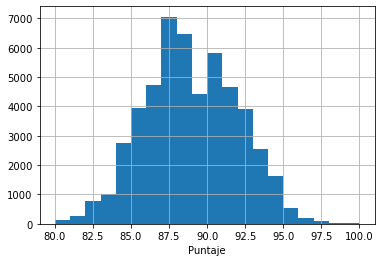

In [54]:
plt.hist(wine_reviews_copia.points, bins= 20)
plt.xlabel('Puntaje')
plt.grid()
plt.show()

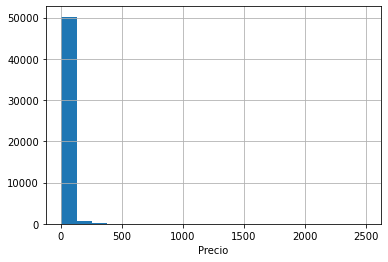

In [55]:
plt.hist(wine_reviews_copia.price, bins= 20)#, log = True)
plt.xlabel('Precio')
plt.grid()
plt.show()

Respecto al segundo gráfico, ¿les gusta cómo queda?¿Qué es una escala logarítmica?

## Extra: Tripulación del Titanic

Si llegaste hasta acá y todavía tenés tiempo y ganas, te proponemos que explores el dataset de Supervivientes del Titanic. Queremos saber si los sobrevivientes del RMS Titanic murieron *al azar* o si los sobrevivientes tenían alguna característica distinta de las víctimas de la tragedia. Tenemos disponibles algunos datos sobre pasajeros/as del Titanic, que pueden descargar [acá](https://www.kaggle.com/c/titanic/) (solo el archivo `train.csv`) o descargar del Trello. La propuesta es analizarlos para intentar encontrar algunas características que separen a los/as pasajeros/as que sobrevivieron de los/as que no.

### Análisis Exploratorio de Datos

1. Cargar los datos desde el archivo csv.
1. Investigar qué forma tienen los datos utilizando las funciones exploratorias que aprendimos. ¿Qué información tenemos en los datos?¿Qué representa cada columna?¿Cuántos pasajeros/as están incluidos/as en este Dataset?
1. ¿Faltan datos? ¿Se te ocurre por qué? ¿Qué harías con ellos?
1. ¿Te parece que todas las columnas son informativas o borrarías alguna?

**Para pensar**: ¿te parece que la supervivencia (o no) fue un proceso completamente *al azar* o existe algún mecanismo generador de estos datos?¿Qué nos enseñó la famosa película de David Cameron?